In [39]:
from numpy import float32, float64
import time
import matplotlib.pyplot as plt
import numpy as np

# Zad 1 

In [40]:
v = float32(0.53125)
tab = [v] * 10**7

def sumaa(tab):
    suma=float32(0.0)
    for i in range(len(tab)):
        suma += tab[i]
    return suma

x = sumaa(tab)
print(x)

5030840.5


In [41]:
y = 5312500

bezwzgl = abs(y - x)
print(bezwzgl)
wzgl = bezwzgl/y
print(wzgl)

281659.5
0.05301825882352941


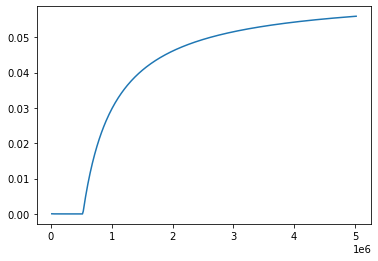

In [42]:
def get_error(tab):
    suma = float32(0)
    tab_error = []
    tab_suma = []
    for i in range(len(tab)):
        suma = suma + tab [i]
        if i % 25000 == 0 and i!=0:
            suma2 = i*v
            blad = abs((suma2-suma)/suma)
            tab_error.append(blad)
            tab_suma.append(suma)
    plt.plot(tab_suma, tab_error)
    plt.show

    
v = float32(0.53125)
tab = [v] * 10**7
get_error(tab)

Interpretacja wykresu - ze wzrostem liczby składników, suma jest coraz bardziej niedokładna. Zależność ta nie jest liniowa - przypomina wykres pierwiastka lub logarytmu. 

In [43]:
def suma_rek(tab):
    if len(tab) == 1:
        return tab[0]
    return suma_rek(tab[:len(tab)//2]) + suma_rek(tab[len(tab)//2:])
print(suma_rek(tab))

5312500.0


Dodaje liczby podobnie duże, przez co unikamy błędu zaokrągleń przy dodawaniu dużej do małej.

In [44]:
print("sumowanie iteracyjne")
start_time = time.time()
x = sumaa(tab)
print(x)
print(" %s seconds" % (time.time() - start_time))

print("sumowanie rekurencyjne")
start_time = time.time()
rx = suma_rek(tab)
print(rx)
print(" %s seconds" % (time.time() - start_time))


sumowanie iteracyjne
5030840.5
 1.9054436683654785 seconds
sumowanie rekurencyjne
5312500.0
 9.452586650848389 seconds


1.7
Przedstaw przykładowe dane wejściowe, dla których algorytm sumowania rekurencyjnego zwraca niezerowy błąd.

In [45]:
v1 = float32(0.555543)
tab1 = [v1] * 10**4
sumaa = suma_rek(tab1)
print(sumaa)

y1 = 5555.43
bezwzgl = abs(y1 - sumaa)
print(bezwzgl)
wzgl = bezwzgl/y1
print(wzgl)

5555.4307
0.0006640624997089617
1.1953395141491506e-07


# Zadanie 2

In [46]:
def Kahan(tab):
    suma = float32(0.0)
    err = float32(0.0)
    y = float32(0.0)
    temp = float32(0.0)
    for i in range (len(tab)):
        y = tab[i] - err
        temp = suma + y
        err = (temp - suma) - y
        suma = temp
    return suma

In [47]:
kx = Kahan(tab)
bezwzgl = abs(y-kx)
print(bezwzgl)
wzgl = bezwzgl/y
print(wzgl)

0.0
0.0


Zmienna err przechowuje błąd wynikający z niemożności trzymania w zmiennej suma
dużych liczb z dużą precyzją (są zaokrąglane). Mówi nam, jaki błąd powinniśmy
uwzględnić (y = tab[i] - err) z kolejną iteracją.

In [48]:
start_time = time.time()
kx = Kahan(tab)
print(kx)
print(" %s seconds" % (time.time() - start_time))

start_time = time.time()
rx = suma_rek(tab)
print(rx)
print(" %s seconds" % (time.time() - start_time))


5312500.0
 6.544358968734741 seconds
5312500.0
 9.503885984420776 seconds


Porównanie algorytmu Kahana i rekurencyjnego - Kahan jest szybszy.

# Zadanie 3 

In [49]:
def Riemann32p(s,n):
    suma = float32(0.0)
    for i in range(1,n+1):
        suma += 1/(i**s)
    print(suma)

def Riemann32t(s,n):
    suma = 0
    for i in range(n,0,-1):
        suma += 1/(i**s)
    print(suma)

def Dirichlet32p(s,n):
    suma = float32(0.0)
    for i in range(1, n+1):
        suma+= (-1)**(i-1)*1/(i**s)
    print(suma)

def Dirichlet32t(s,n):
    suma = float64(0.0)
    for i in range(n, 0,-1):
        suma+= (-1)**(i-1)/(i**s)
    print(suma)
    
def Riemann64p(s,n):
    suma = float64(0.0)
    for i in range(1,n+1):
        suma += 1/(i**s)
    print(suma)

def Riemann64t(s,n):
    suma = float64(0.0)
    for i in range(n,0,-1):
        suma += 1/(i**s)
    print(suma)

def Dirichlet64p(s,n):
    suma = float64(0.0)
    for i in range(1, n+1):
        suma+= (-1)**(i-1)*1/(i**s)
    print(suma)

def Dirichlet64t(s,n):
    suma = float64(0.0)
    for i in range(n, 0,-1):
        suma+= (-1)**(i-1)/(i**s)
    print(suma)

In [50]:
Riemann32p(float32(2),50)
Riemann32t(float32(2),50)
Riemann64p(float64(2),50)
Riemann64t(float64(2),50)
print(" ")
Riemann32p(float32(3.6667),100)
Riemann32t(float32(3.6667),100)
Riemann64p(float64(3.6667),100)
Riemann64t(float64(3.6667),100)
print(" ")
Riemann32p(float32(5), 200)
Riemann32t(float32(5),200)
Riemann64p(float64(5),200)
Riemann64t(float64(5),200)
print("")
Riemann32p(float32(7.2),500)
Riemann32t(float32(7.2),500)
Riemann64p(float64(7.2),500)
Riemann64t(float64(7.2),500)
print(" ")
Riemann32p(float32(10), 1000)
Riemann32t(float32(10),1000)
Riemann64p(float32(10),1000)
Riemann64t(float32(10),1000)


1.625132733621529
1.6251327336215293
1.625132733621529
1.6251327336215293
 
1.10940880817909
1.1094088081790894
1.1094087973421474
1.1094087973421476
 
1.0369277549886775
1.036927754988676
1.0369277549886775
1.036927754988676

1.0072276674732752
1.0072276674732774
1.0072276664807145
1.0072276664807172
 
1.0009945751278182
1.000994575127818
1.0009945751278182
1.000994575127818


In [51]:
Dirichlet32p(float32(2),50)
Dirichlet32t(float32(2),50)
Dirichlet64p(float64(2),50)
Dirichlet64t(float64(2),50)
print("")
Dirichlet32p(float32(3.6667),100)
Dirichlet32t(float32(3.6667),100)
Dirichlet64p(float64(3.6667),100)
Dirichlet64t(float64(3.6667),100)
print("")
Dirichlet32p(float32(5),200)
Dirichlet32t(float32(5),200)
Dirichlet64p(float64(5),200)
Dirichlet64t(float64(5),200)
print("")
Dirichlet32p(float32(7.2),500)
Dirichlet32t(float32(7.2),500)
Dirichlet64p(float64(7.2),500)
Dirichlet64t(float64(7.2),500)
print("")
Dirichlet32p(float32(10),1000)
Dirichlet32t(float32(10),1000)
Dirichlet64p(float64(10),1000)
Dirichlet64t(float64(10),1000)
print("")

0.8222710318260295
0.8222710318260289
0.8222710318260295
0.8222710318260289

0.9346933165042048
0.934693316504205
0.9346933211400662
0.934693321140067

0.972119770445367
0.9721197704453663
0.972119770445367
0.9721197704453663

0.9935269998293503
0.9935269998293504
0.9935270006616201
0.9935270006616198

0.9990395075982718
0.9990395075982715
0.9990395075982718
0.9990395075982715



Przy zastosowaniu pojedynczej i podwójnej precyzji wyniki różnią się, jednak tylko w przypadku liczb, które mają więcej cyfr po przecinku. Oczywiście, przy podwójnej precyzji są dokładniejsze. 

W każdym przypadku natomiast wyniki sumowania w przód i w tył różnią się. Dają podobne wyniki, ale dzięki temu, że dodając od tyłu zaczynamy od mniejszych liczb i dodajemy je do siebie, dokładność w tym przypadku jest większa. Dodając w przód te mniejsze liczby mają mniejszy wpływ na kolejne duże liczby, "gubią się" przy zaokrągleniach. 

# Zad 4

Przy wykonywaniu tego zadania korzystalam z:
https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/
https://en.wikipedia.org/wiki/Logistic_map

In [52]:
def logistic (r,x):
    return r*x*(1-x)

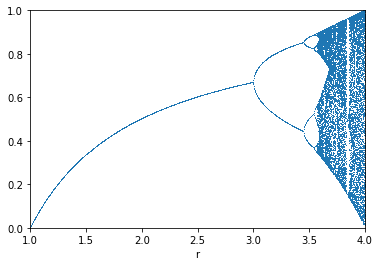

In [53]:
def bifurcation_diagram(x0, iterations, skip):
    r_range=np.linspace(1,4, 1000)
    last = 100
    R = []
    Y = []
    for r in r_range:
        x=x0
        for i in range(iterations):
            if i>=(iterations - skip):
                R.append(r)
                Y.append(x)
            x = logistic(r, x)

    plt.plot(R, Y, ',' ,marker=',')
    plt.ylim(0,1)
    plt.xlim(1,4)
    plt.xlabel("r")
    plt.show()
bifurcation_diagram(0.2, 1000,100)

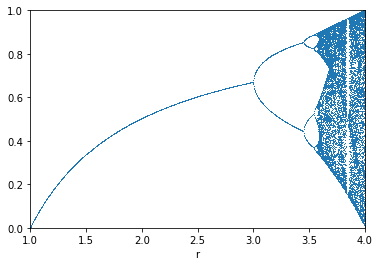

In [54]:
def bifurcation_diagram(x0, iterations, skip):
    r_range=np.linspace(1,4, 1000)
    last = 100
    R = []
    Y = []
    for r in r_range:
        x=x0
        for i in range(iterations):
            if i>=(iterations - skip):
                R.append(r)
                Y.append(x)
            x = logistic(r, x)

    plt.plot(R, Y, ',', marker=',')
    plt.ylim(0,1)
    plt.xlim(1,4)
    plt.xlabel("r")
    plt.show()
bifurcation_diagram(float32(0.0001), 1000,100)

Pomiędzy 0 a 1 im większe r - tym więsza wartość x. W 3 wykres rozchodzi się
na dwie części - wartości oscylują między dwoma wartościami. Następne w okolicach
3.5 rozdziela się na kolejne dwie wartości. W punkcie r = 3.6 zaczyna się chaos, nie da
się przewidzieć kolejnych wartości.

In [ ]:
def logistic_c (x):
    r =4
    i = 0
    while x!=0:
        x=r*(1-x)
        i+=1
    return i
print(logistic_c(float32(0.0000001)))

Nie udało mi się znaleźć takiej liczby, aby x wynosiło 0. 